## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

movies_data = pd.read_csv("mkrf_movies.csv")
shows_data = pd.read_csv("mkrf_shows.csv")
print(movies_data["puNumber"].dtypes)
print(shows_data["puNumber"].dtypes)
shows_data["puNumber"] = shows_data["puNumber"].astype('str')
df = movies_data.merge(shows_data, on="puNumber", how="left")
display(df.head())
df.info()

object
int64


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

 Можно преобразовать столбец show_start_date в datetime и столбец ratings в float.

In [2]:
df["show_start_date"] = df["show_start_date"].apply(lambda x: x[:-5])
df["show_start_date"] = pd.to_datetime(df["show_start_date"], format="%Y-%m-%dT%H:%M:%S")

In [3]:
df.ratings.unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)


 
 
 Стало понятно, почему столбцей ratings типа object, некоторые значения переданы как проценты, вместо оценки по десятибалльной шкале, и ещё присутсвуют пустые значения. Переведём % в оценку до десятибальной шкале.

In [4]:
def sc(x):
    if pd.notna(x) and x[-1]=="%":
        return float(x[:-1])/10
    if pd.notna(x):        
        return float(x)
    
df["ratings"] = df["ratings"].apply(sc)
df["ratings"].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

  В столбцах refundable_support, nonrefundable_support, financing_source, budget данные указаны только там, где была выдана государственная поддержка, в стобце ratings, можно заменить пропуски на медианное значение, т.к. оно более устойчиво (чем среднее арифм.) к выбросам, для других столбцов (например genres, producer) подходящей замены не найдётся.

In [5]:
df["ratings"] = df["ratings"].fillna(df["ratings"].median())
df["ratings"].median()

6.6

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [6]:
df.duplicated().sum()

0

 Полносью одинаковых строк нет.

In [7]:
print(len(df["title"]))
len(df["title"].unique())

7486


6772

 Из этого можно сделать вывод, что присутсвуют строки с одинаковыми названиями фильмов.

In [8]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


 Уже из первых строчек можно увидеть строки с одинаковыми названиями фильмов. Но из данных отличается только дата старта проката. Из этого можно сделать вывод, что скорее всего где-то были взяты данные по одним и тем же фильмам, но по разным странам проката, чем и обусловлены разные даты. Поэтому нужно удалить дубликаты и оставить данные только по одному прокату, так как иначе одинаковые данные испортят исследование.

In [9]:
df = df.drop_duplicates("title").reset_index(drop=True)
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
4,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [10]:
df.type.unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

 Тип "Художественный" дублируется из-за пробела в начале.

In [11]:
df["type"] = df["type"].str.strip()

 Для остальных категориальных столбцов таких проблем не выявлено.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [12]:
a = df[["budget", "refundable_support", "nonrefundable_support"]].dropna().copy()
a.query("budget < nonrefundable_support + refundable_support")

,budget,refundable_support,nonrefundable_support
1872,0.0,0.0,23000000.0
1877,0.0,0.0,75000000.0
2254,0.0,10000000.0,70000000.0
2312,0.0,20000000.0,0.0
2386,0.0,60000000.0,100000000.0
2448,0.0,0.0,59000000.0
2544,0.0,0.0,35000000.0
2624,0.0,0.0,6000000.0
2789,0.0,19000000.0,51000000.0
3279,0.0,0.0,250000000.0


 Столбец budget должен включать в себя полный объём государственной поддержки. Но присутсвуют столбцы, где бюджет равен нулю, хотя присутсвует государственная поддержка. Значит это какая-то ошибка. У меня есть два варианта: либо весь бюджет фильма составлял полностью из гос. поддержки, и тем самым по каким-то причинам его не указали, либо по из-за чего-то другого данные по бюджету были утеряны/не указаны у некоторых фильмо. Во втором случае с этими данными ничего не сделаешь, а вот в первом их можно исправить, поэтому прдеположу, что это было именно так.

In [13]:
def f(x):
    if (x.loc["budget"] < x.loc["nonrefundable_support"] + x.loc["refundable_support"]) and pd.notna(x.loc["budget"]):
        x.loc["budget"] = x.loc["nonrefundable_support"] + x.loc["refundable_support"]
    return x
df = df.apply(f, axis=1)

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [14]:
df["year"] = df["show_start_date"].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [15]:
df["director"] = df["director"].astype("str")
df["genres"] = df["genres"].astype("str")

def n(x):   
    if x.find(".")!=-1:
        x = x.split(".")
    else:
        x = x.split(" ")
    if len(x[0])==1:
        return None
    if x[0].find(" "):
        return x[0].split(" ")[0]
    return x[0]

def f(x):   
    if x.find(".")!=-1:
        x = x.split(".")
    else:
        x = x.split(" ")
    if len(x)>1:
        return x[1]
    return None
    
def g(x):
    if x.find(","):
        x = x.split(",")
        return x[0]
    return x

df["name"], df["surname"], df["main_genre"] = df["director"].apply(n), df["director"].apply(f), df["genres"].apply(g)
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,name,surname,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин,Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,None,Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур,Бекмамбетов,фантастика
3,Остановился поезд,111013816,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN,2016,None,Абдрашитов,драма
4,Любовь и голуби,111007013,2013-10-18 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0,2013,None,Меньшов,мелодрама


 В столбце много, где встречаются сокращения имён, из-за этого нельзя узнать имя режиссёра, также из-за функций встретились проблемы, что где-то в столбцах попадались значения float, надо подробней изучить этот вопрос. Ещё можно попробовать реализовать это всё через одну функцию и применить к двум столбцам сразу.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [16]:
df["gos"] = (df["refundable_support"] + df["nonrefundable_support"]) / df["budget"]

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

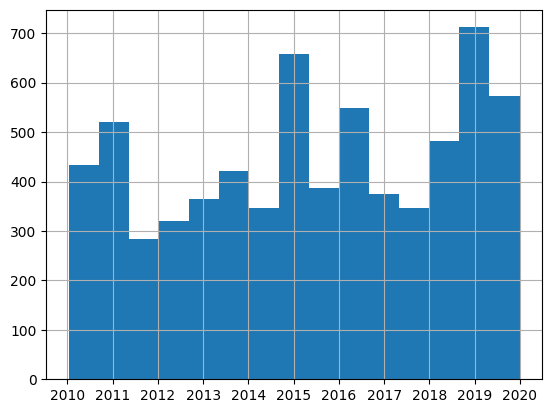

In [17]:
df["show_start_date"].hist(bins=15)
plt.show()

In [18]:
df["year"].value_counts()

year
2019    891
2018    875
2016    771
2010    762
2014    730
2015    661
2013    590
2012    517
2017    498
2011    477
Name: count, dtype: int64

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

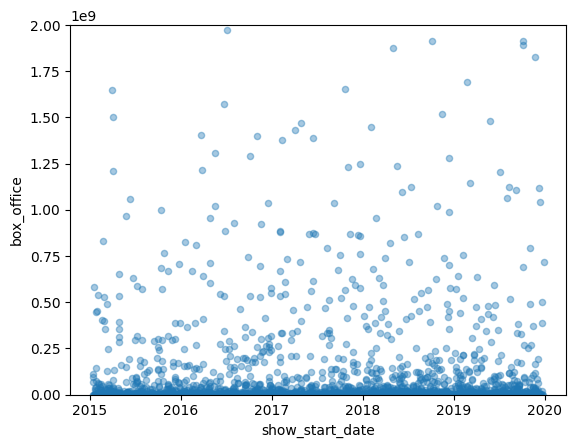

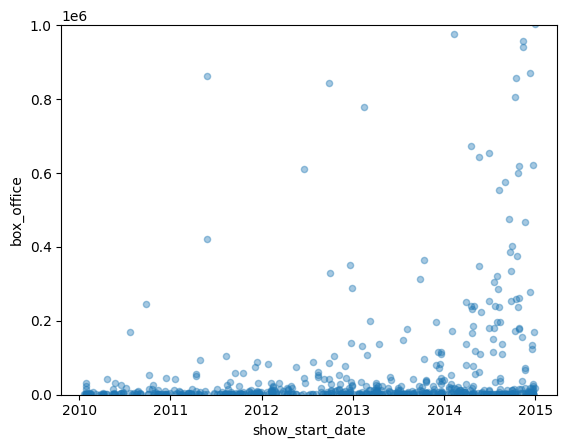

0.14462119450707478


year
2010    2.374340e+06
2011    1.394439e+07
2012    6.465111e+06
2013    2.976853e+07
2014    7.372599e+09
2015    3.208465e+10
2016    4.373144e+10
2017    4.856155e+10
2018    4.797099e+10
2019    4.840940e+10
Name: box_office, dtype: float64

In [19]:
df.query("box_office>0 and year>=2015").plot(x="show_start_date", y="box_office", kind="scatter", alpha=0.4, ylim=(0, 2*10**9))
plt.show()
df.query("box_office>0 and year<2015").plot(x="show_start_date", y="box_office", kind="scatter", alpha=0.4, ylim=(0, 10**6))
plt.show()
print(df["box_office"].corr(df["year"]))
df.query("box_office>0 and year<2015")
df.groupby("year")["box_office"].sum()

  Очень странный прирост в сборах начиная с конца 2014 года, пока непонятно чем это вызвано. Ещё я не обнаружил, отсутсвующих данных по выходу фильмов в прокат, о чём говорилось в условие... Максимальные сборы по фильмам были в 2017 году, а минимальные в 2011. Сборы до 2014 года почему-то на несколько порядков меньше, чем после 2014.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [20]:
df.pivot_table(index="year", values="box_office", aggfunc=["mean", "median"])

,mean,median
,box_office,box_office
year,,
2010,2.698114e+04,1868.00
2011,1.422897e+05,3042.50
2012,5.573372e+04,6692.50
2013,1.691394e+05,3565.00
2014,2.868715e+07,22490.00
2015,7.444234e+07,4327265.70
2016,8.728831e+07,3640802.30
2017,1.364089e+08,10177833.50


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

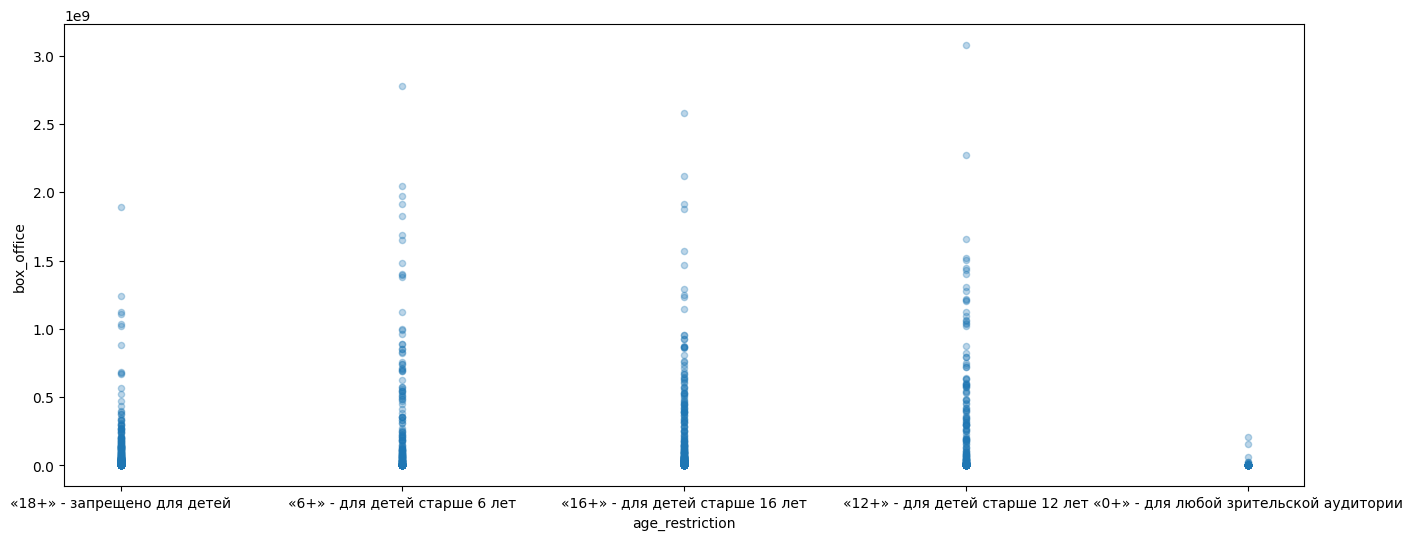

In [26]:
df.query("year>=2015").plot(x="age_restriction", y="box_office", kind="scatter", figsize=(16, 6), alpha=0.3)
plt.show()

In [21]:
df.query("year>=2015").groupby("age_restriction")["box_office"].sum()

age_restriction
«0+» - для любой зрительской аудитории    7.033453e+08
«12+» - для детей старше 12 лет           5.893083e+10
«16+» - для детей старше 16 лет           6.894596e+10
«18+» - запрещено для детей               3.668539e+10
«6+» - для детей старше 6 лет             5.549252e+10
Name: box_office, dtype: float64

 С 2015 по 2019 годы самые большие сборы у категории 16+, а самые маленькие у 0+. 

In [22]:
df.query("year>=2015").groupby(["year", "age_restriction"])["box_office"].sum()

year  age_restriction                       
2015  «0+» - для любой зрительской аудитории    2.733678e+08
      «12+» - для детей старше 12 лет           1.195722e+10
      «16+» - для детей старше 16 лет           8.274253e+09
      «18+» - запрещено для детей               3.184098e+09
      «6+» - для детей старше 6 лет             8.395710e+09
2016  «0+» - для любой зрительской аудитории    1.501835e+08
      «12+» - для детей старше 12 лет           1.217834e+10
      «16+» - для детей старше 16 лет           1.435935e+10
      «18+» - запрещено для детей               4.990430e+09
      «6+» - для детей старше 6 лет             1.205314e+10
2017  «0+» - для любой зрительской аудитории    2.295989e+08
      «12+» - для детей старше 12 лет           7.851428e+09
      «16+» - для детей старше 16 лет           1.874289e+10
      «18+» - запрещено для детей               9.651496e+09
      «6+» - для детей старше 6 лет             1.208614e+10
2018  «0+» - для любой зрительской аудит

 Во все годы ситуация примерно одинаковая, 0+ собирают меньше всего, а 16+ в основном больше всего, но где-то наравне с 6+ и 12+. 18+ в целом от всех кроме 0+ отстаёт по сборам, тут я думаю всё понятно.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

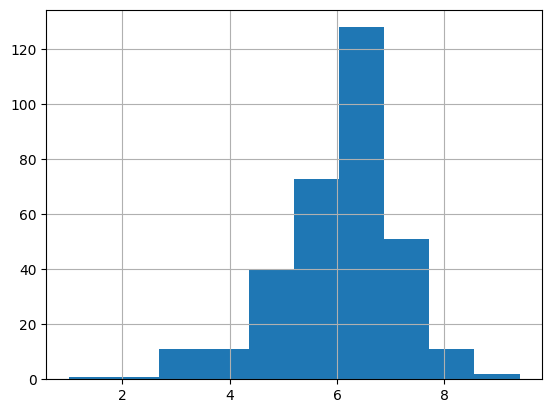

count    329.000000
mean       6.046809
std        1.127780
min        1.000000
25%        5.400000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

In [81]:
data = df.query("budget>0").copy()
data["ratings"].hist()
plt.show()
data["ratings"].describe()

 Средний рейтинг составляет 6-7.

count    3.160000e+02
mean     1.332534e+08
std      3.357391e+08
min      1.550000e+03
25%      1.227870e+06
50%      1.639050e+07
75%      1.069345e+08
max      3.073569e+09
Name: box_office, dtype: float64

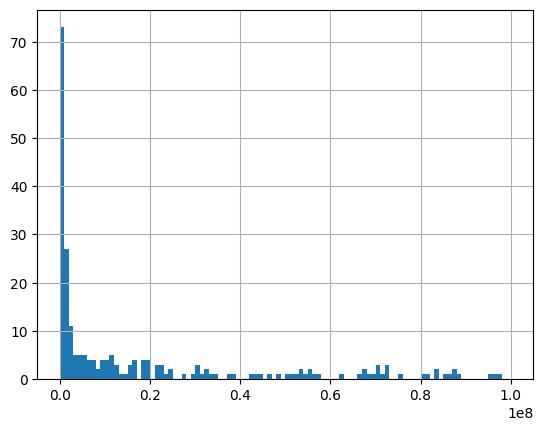

In [84]:
data["box_office"].hist(bins=100, range=(0, 10**8))
data["box_office"].describe()

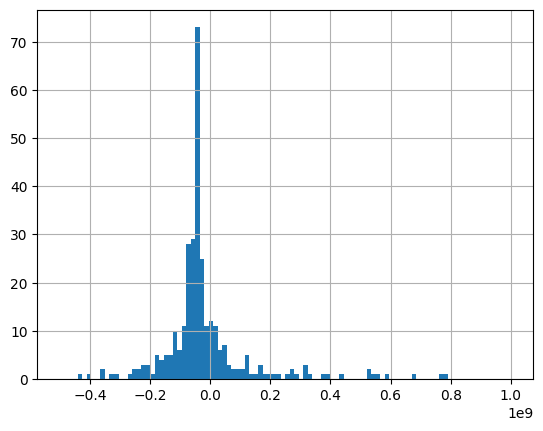

In [105]:
def pr(x):
    if x["box_office"]>0:
        return x["box_office"] - x["budget"]
    return None
data["profit"] = data[["box_office","budget"]].apply(pr, axis=1)
data["profit"].hist(bins=100, range=(-5*10**8, 10**9))
plt.show()

 В диаграмме прибыли наблюдается нормальное распределение. Но можно с уверенностью сказать, что в основном фильмы с гос. поддержкой не окупались.

In [112]:
data.query("profit<0").count()["profit"] - data.query("profit>0").count()["profit"]

158

 На столько больше фильмов, которые не окупились.

### Шаг 5. Напишите общий вывод

 Вывод напишу позже, через некоторое время хочу вернуться к этому и прошлому проекту, чтобы уже более опытным исправить свои косяки (почему-то мне кажется, что их много, особенно в прошлом проекте). Этот проект в целом оказался гораздо проще предыдущего, и как по мне более интересным. Для себя я отметил, что именно аналитика, точно не моё, но всё равно это очень полезный навык в ml, как минимум работать с pandas и визуализацией точно придётся. Но, надеюсь, что углубляться в аналитику не надо будет. 